In [74]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [75]:
train = pd.read_csv("data/Train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 1559 entries, feature_1 to Class
dtypes: float64(1), int64(1558)
memory usage: 21.0 MB


In [76]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_1,1763.0,53.094158,55.842014,1.0000,12.00,39.0,75.0,640.0
feature_2,1763.0,126.587067,129.859641,1.0000,33.50,96.0,159.0,640.0
feature_3,1763.0,3.423940,4.566858,0.0015,1.25,2.0,4.5,60.0
feature_4,1763.0,0.724334,0.446976,0.0000,0.00,1.0,1.0,1.0
feature_5,1763.0,0.002836,0.053194,0.0000,0.00,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
feature_1555,1763.0,0.015315,0.122837,0.0000,0.00,0.0,0.0,1.0
feature_1556,1763.0,0.014748,0.120575,0.0000,0.00,0.0,0.0,1.0
feature_1557,1763.0,0.009643,0.097750,0.0000,0.00,0.0,0.0,1.0
feature_1558,1763.0,0.001134,0.033672,0.0000,0.00,0.0,0.0,1.0


In [77]:
test = pd.read_csv("data/Test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 1558 entries, feature_1 to feature_1558
dtypes: float64(4), int64(1554)
memory usage: 9.0 MB


In [78]:
X_train = train.loc[:, 'feature_1':'feature_1558']
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 1558 entries, feature_1 to feature_1558
dtypes: float64(1), int64(1557)
memory usage: 21.0 MB


In [79]:
y_train = train.loc[:, 'Class']
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [80]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(test)

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(test)

In [82]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

In [96]:
# from sklearn.naive_bayes import GaussianNB
# nb_model = GaussianNB()
# nb_model.fit(X_train, y_train)

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(objective='binary:logistic')
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
# nb_prob = nb_model.predict_proba(X_val)[:,1] # This will give you positive class prediction probabilities  
# nb_pred = np.where(nb_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
# nb_model.score(X_val, nb_pred)

nb_pred = xgb_clf.predict(X_val)

In [98]:
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_val,nb_pred)
confusion_matrix

array([[477,  10],
       [ 11,  31]], dtype=int64)

In [99]:
auc_roc=metrics.roc_auc_score(y_val,nb_pred)
auc_roc

0.8587806785958737

In [100]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, nb_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9911019849418206

In [101]:
# for t, f, th in zip(true_positive_rate, false_positive_rate, thresholds):
#     print(t,f,th)

roc_df = pd.DataFrame({'true_positive_rate': true_positive_rate,
                      'false_positive_rate': false_positive_rate,
                      'thresholds': thresholds})
roc_df

,true_positive_rate,false_positive_rate,thresholds
0,0.000000,0.000000,2.000000
1,0.333333,0.000000,1.000000
2,0.500000,0.000000,1.000000
3,0.523810,0.002053,1.000000
4,0.595238,0.002053,1.000000
5,0.595238,0.004107,0.999999
6,0.642857,0.004107,0.999997
7,0.642857,0.006160,0.999968
8,0.690476,0.006160,0.999960
9,0.690476,0.008214,0.999904


Text(0.5, 0, 'False Positive Rate')

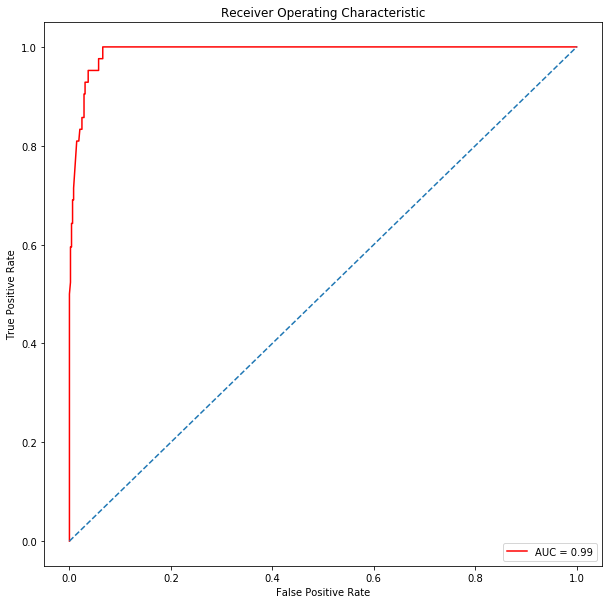

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [104]:
# nb_prob_test = nb_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
# nb_pred_test = np.where(nb_prob_test > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
# nb_pred_test

nb_pred_test = xgb_clf.predict(X_test)

In [106]:
nb_pred_test.shape

(756,)

In [107]:
submission_data=pd.read_csv('data/Sample_submission.csv')
submission_data['Class']=nb_pred_test
submission_data.to_csv('submissions/Submission2_lda_xgb.csv',index=False)